In [9]:
import pandas as pd

mdl = pd.read_csv('dataset/DSProjectData.csv', skipinitialspace=True, low_memory=False)
mdl['Date'] = pd.to_datetime(mdl['Date'])
mdl.set_index('Date', inplace=True)
mdl['Month']= mdl.index.month
mdl['Day']=mdl.index.day

In [10]:
mdl01=mdl[mdl['Server Name']=='CALBIPRD01']

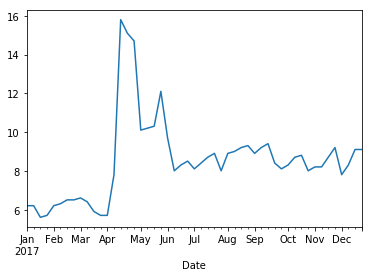

In [11]:
mdl01['RAM'].dropna().plot()

In [5]:
print mdl01['RAM'].dropna().autocorr(lag=1)
print mdl01['RAM'].dropna().autocorr(lag=2)
print mdl01['RAM'].dropna().autocorr(lag=3)
print mdl01['RAM'].dropna().autocorr(lag=4)
print mdl01['RAM'].dropna().autocorr(lag=5)
print mdl01['RAM'].dropna().autocorr(lag=6)
print mdl01['RAM'].dropna().autocorr(lag=7)
print mdl01['RAM'].dropna().autocorr(lag=8)

0.767088353787
0.483051946537
0.229474533558
0.181119443382
0.141176812022
0.0657656873816
-0.0833556674342
-0.174311758372


/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


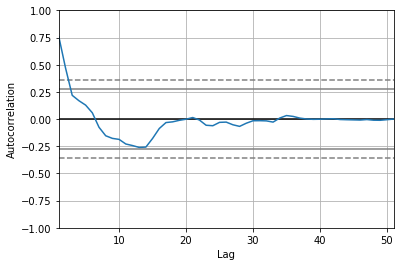

In [6]:
%matplotlib inline
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(mdl01['RAM'].dropna())

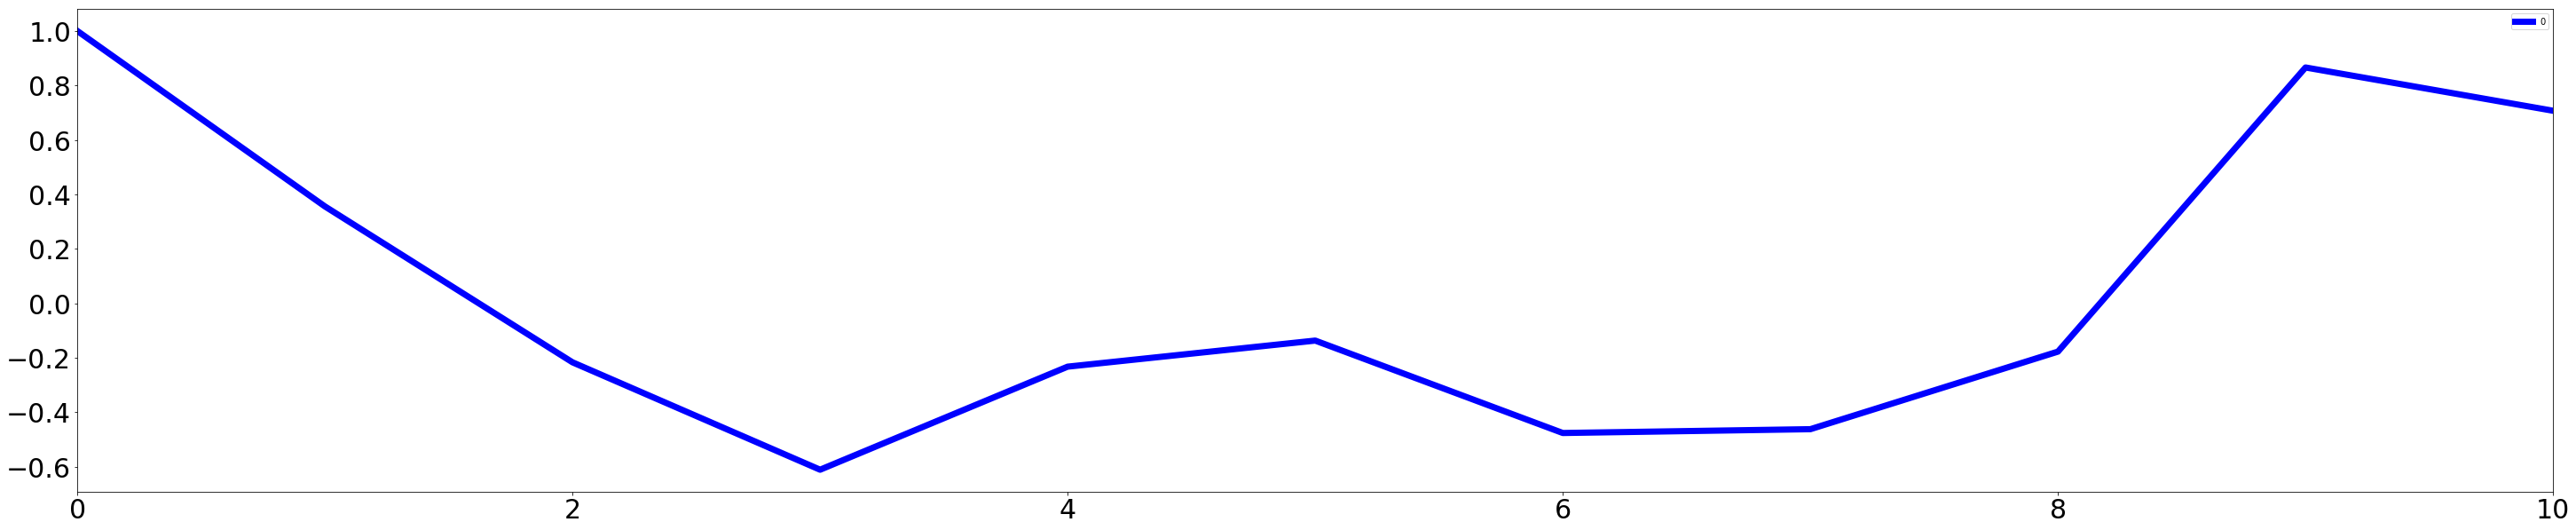

In [8]:
autoc = []

for i in range(11):
    autoc.append(mdl01['RAM'].resample('M').mean().autocorr(lag=1*i))

df = pd.DataFrame(autoc)
df.plot(figsize=(50,10), fontsize=30, legend=True, color ='blue', linewidth=7.0)

<b> pd AR </b>

<b>Statsmodels AR </b>

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


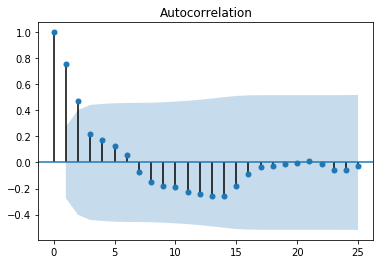

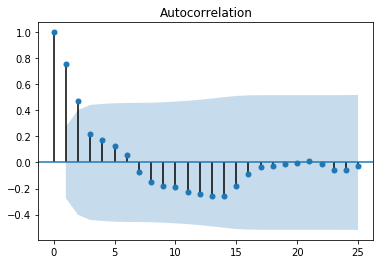

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(mdl01['RAM'].dropna(),lags=25)

In [22]:
mdl01['RAM'].dropna().diff(1).dropna()

Date
2017-01-14    0.0
2017-01-21   -0.6
2017-01-28    0.1
2017-02-04    0.5
2017-02-11    0.1
2017-02-18    0.2
2017-02-25    0.0
2017-03-04    0.1
2017-03-11   -0.2
2017-03-18   -0.5
2017-03-25   -0.2
2017-04-01    0.0
2017-04-08    2.1
2017-04-15    8.0
2017-04-22   -0.7
2017-04-29   -0.4
2017-05-06   -4.6
2017-05-13    0.1
2017-05-20    0.1
2017-05-27    1.8
2017-06-03   -2.4
2017-06-10   -1.7
2017-06-17    0.3
2017-06-24    0.2
2017-07-01   -0.4
2017-07-08    0.3
2017-07-15    0.3
2017-07-22    0.2
2017-07-29   -0.9
2017-08-05    0.9
2017-08-12    0.1
2017-08-19    0.2
2017-08-26    0.1
2017-09-02   -0.4
2017-09-09    0.3
2017-09-16    0.2
2017-09-23   -1.0
2017-09-30   -0.3
2017-10-07    0.2
2017-10-14    0.4
2017-10-21    0.1
2017-10-28   -0.8
2017-11-04    0.2
2017-11-11    0.0
2017-11-18    0.5
2017-11-25    0.5
2017-12-02   -1.4
2017-12-09    0.5
2017-12-16    0.8
2017-12-23    0.0
Name: RAM, dtype: float64

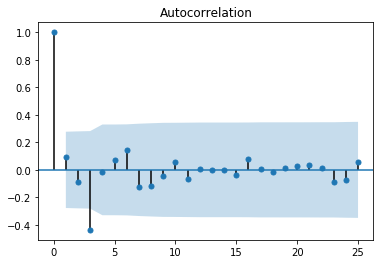

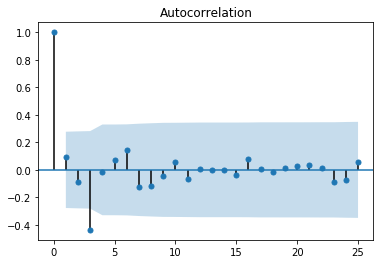

In [26]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(mdl01['RAM'].dropna().diff(1).dropna(), lags=25)

# lags =25 used here to find the seasonality ..ex. for week seasonlity use 1 for month use 4 for quater 4X3=12 for halft
#year 4x6=24

#autoc = []

#for i in range(11):
   
    #autoc.append(mdl01['RAM'].resample('M').mean().autocorr(lag=1*i))

#df = pd.DataFrame(autoc)
#df.plot(figsize=(50,10), fontsize=30, legend=True, color ='blue', linewidth=7.0)

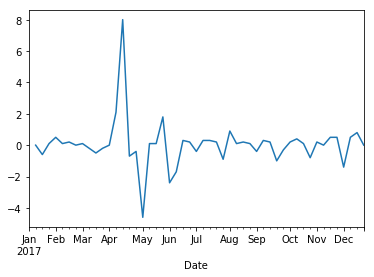

In [27]:
mdl01['RAM'].dropna().diff(1).plot()

<b>Statsmodels ARMA </b>

In [27]:
from statsmodels.tsa.arima_model import ARMA

mdl01_ram = mdl01['RAM'].dropna().astype(float)
mdl01ramar = ARMA(mdl01_ram, (2,0)).fit()
mdl01ramar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    RAM   No. Observations:                   51
Model:                     ARMA(2, 0)   Log Likelihood                 -88.266
Method:                       css-mle   S.D. of innovations              1.353
Date:                Tue, 02 Jan 2018   AIC                            184.531
Time:                        21:42:03   BIC                            192.258
Sample:                    01-07-2017   HQIC                           187.484
                         - 12-23-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4777      0.626     13.553      0.000       7.252       9.704
ar.L1.RAM      0.9432      0.134      7.036      0.000       0.680       1.206
ar.L2.RAM     -0.2374      0.135     -1.761      0.085      -0.502       0.027
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9866           -0.5155j            2.0524           -0.0404
AR.2            1.9866           +0.5155j            2.0524            0.0404
-----------------------------------------------------------------------------
"""

<b>Statsmodels ARMA plot </b>

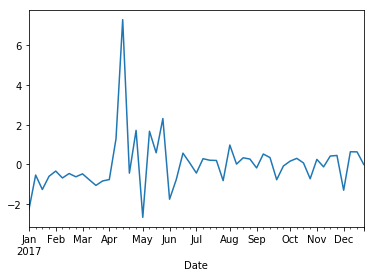

In [28]:
mdl01ramar.resid.plot()

<b>Plot AR  Vs ARMA</b>

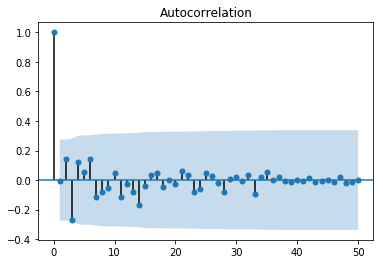

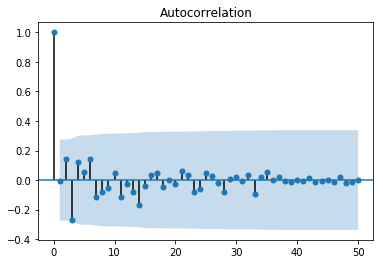

In [29]:
plot_acf(mdl01ramar.resid, lags=50)

<b> ARMA </B>

In [30]:
mdl01ram2ar=ARMA(mdl01_ram,(1,1)).fit()
mdl01ram2ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    RAM   No. Observations:                   51
Model:                     ARMA(1, 1)   Log Likelihood                 -88.730
Method:                       css-mle   S.D. of innovations              1.366
Date:                Tue, 02 Jan 2018   AIC                            185.461
Time:                        21:42:11   BIC                            193.188
Sample:                    01-07-2017   HQIC                           188.414
                         - 12-23-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4535      0.699     12.100      0.000       7.084       9.823
ar.L1.RAM      0.6841      0.117      5.862      0.000       0.455       0.913
ma.L1.RAM      0.2045      0.132      1.552      0.127      -0.054       0.463
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4619           +0.0000j            1.4619            0.0000
MA.1           -4.8896           +0.0000j            4.8896            0.5000
-----------------------------------------------------------------------------
"""

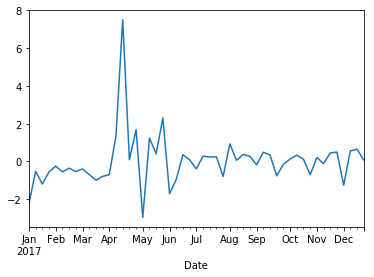

In [31]:
mdl01ram2ar.resid.plot()

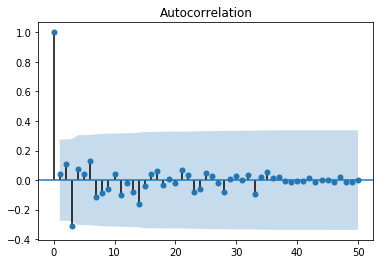

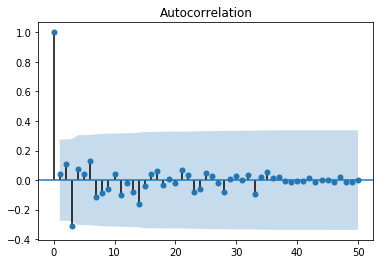

In [32]:
plot_acf(mdl01ram2ar.resid, lags=50)

<b> Statesmodels ARIMA (1, 0, 1)</b>

In [33]:
from statsmodels.tsa.arima_model import ARIMA

mdl01ramari = ARIMA(mdl01_ram, (1, 1, 1)).fit()
mdl01ramari.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    RAM   No. Observations:                   51
Model:                     ARMA(1, 1)   Log Likelihood                 -88.730
Method:                       css-mle   S.D. of innovations              1.366
Date:                Tue, 02 Jan 2018   AIC                            185.461
Time:                        21:42:17   BIC                            193.188
Sample:                    01-07-2017   HQIC                           188.414
                         - 12-23-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4535      0.699     12.100      0.000       7.084       9.823
ar.L1.RAM      0.6841      0.117      5.862      0.000       0.455       0.913
ma.L1.RAM      0.2045      0.132      1.552      0.127      -0.054       0.463
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4619           +0.0000j            1.4619            0.0000
MA.1           -4.8896           +0.0000j            4.8896            0.5000
-----------------------------------------------------------------------------
"""

<b> Statesmodels ARIMA (1, 1, 0)</b>

In [34]:
mdl01ramari = ARIMA(mdl01_ram, (1, 1, 0)).fit()
mdl01ramari.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.RAM   No. Observations:                   50
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -90.610
Method:                       css-mle   S.D. of innovations              1.482
Date:                Tue, 02 Jan 2018   AIC                            187.221
Time:                        21:42:19   BIC                            192.957
Sample:                    01-14-2017   HQIC                           189.405
                         - 12-23-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0578      0.231      0.250      0.803      -0.394       0.510
ar.L1.D.RAM     0.0937      0.139      0.672      0.505      -0.179       0.367
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           10.6710           +0.0000j           10.6710            0.0000
-----------------------------------------------------------------------------
"""

In [35]:
mdl01['RAM'].dropna().diff(1).autocorr(1)

0.095581543585832304

<b> ARIMA Plot (1,1,0) </b>

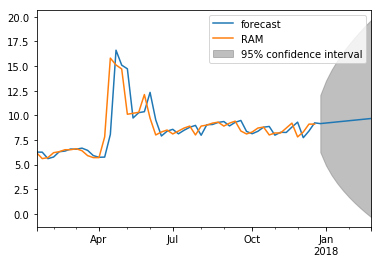

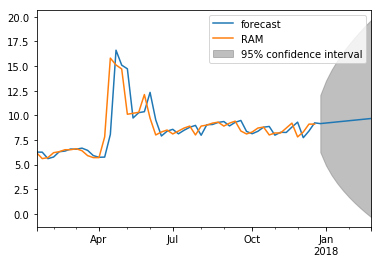

In [60]:
mdl01ramari.plot_predict(1, 60)

<b>Matplotlib AR Vs ARMA Vs ARIMA Plot </b>

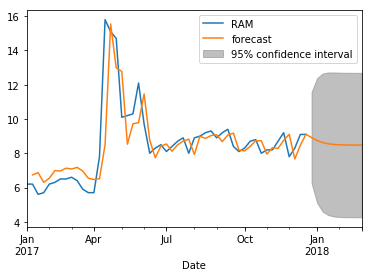

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = mdl01['RAM'].dropna().plot(ax=ax)
fig = mdl01ramar.plot_predict(1, 60, ax=ax, plot_insample=False)

#model_01ram = model_01['RAM'].dropna().astype(float)

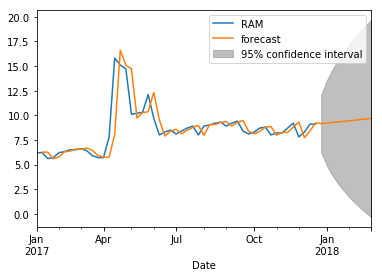

In [40]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = mdl01['RAM'].dropna().plot(ax=ax)
fig = mdl01ramari.plot_predict(1, 60, ax=ax, plot_insample=False)